<a href="https://colab.research.google.com/github/fadilamin/CVfadil/blob/main/CV_Sesi2_FeatureDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import cv2
import matplotlib.pyplot as plt

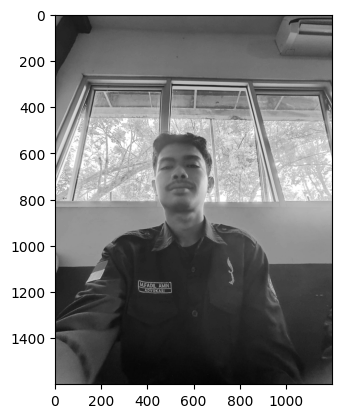

In [ ]:
im = cv2.imread('poto2.jpeg') #Sesuaikan dengan nama file
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
#Menerapkan filter canny
filter_canny = cv2.Canny(im,25,255,L2gradient=False)
#Menerapkan filter sobel
filter_sobel = cv2.Sobel(src=im, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=5)


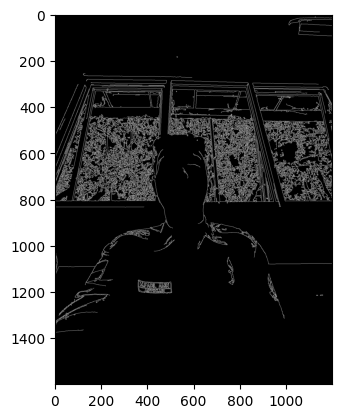

In [ ]:
plt.imshow(filter_canny, cmap='gray')
plt.show()

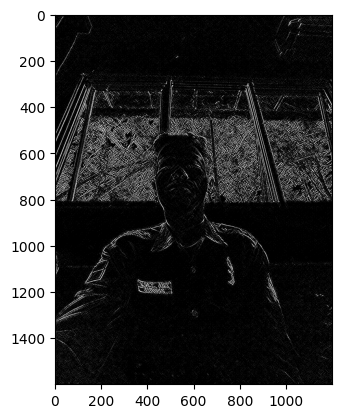

In [ ]:
plt.imshow(filter_sobel, cmap='gray')
plt.show()

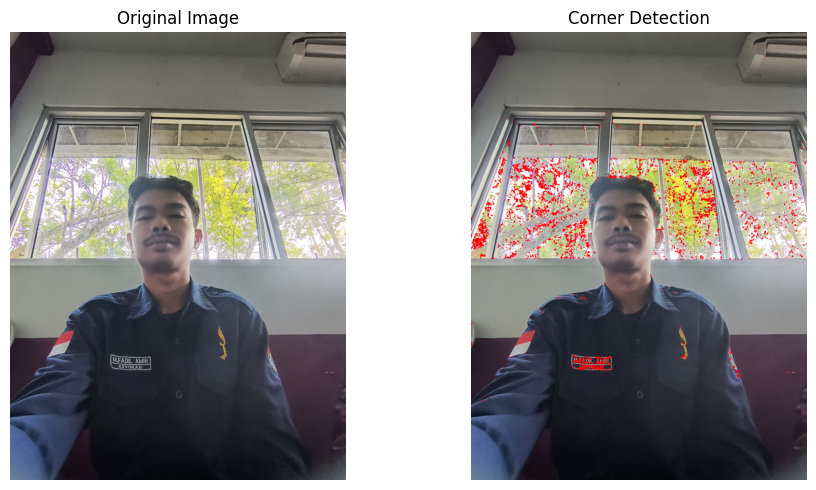

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = 'poto2.jpeg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform corner detection using the Harris corner detection algorithm
corner_detection = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corner_detection = cv2.dilate(corner_detection, None)

# Define a threshold for identifying corners
threshold = 0.01 * corner_detection.max()

# Mark the detected corners with a red color
marked_image = image.copy()
marked_image[corner_detection > threshold] = [0, 0, 255]  # Red color for corners

# Display the original and marked images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
plt.title('Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

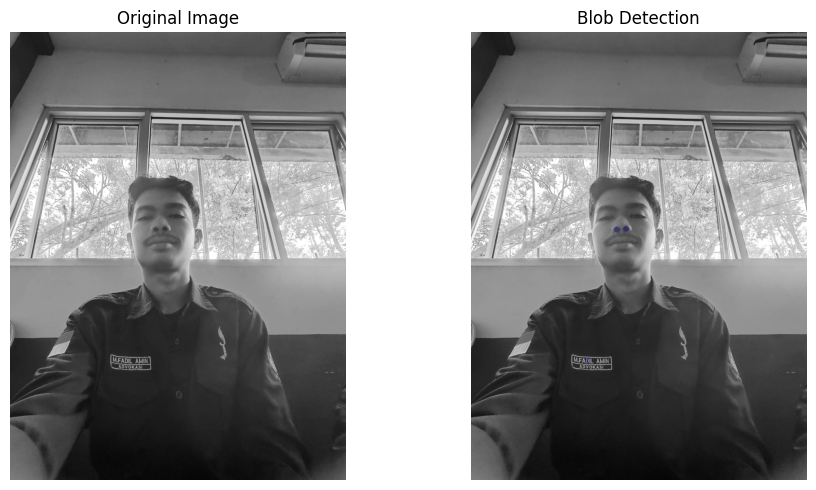

In [ ]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

image_path = 'poto2.jpeg'
image = cv2.imread(image_path)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area
params.filterByArea = True
params.minArea = 100

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original and marked images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('Blob Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving poto2.jpeg to poto2 (1).jpeg


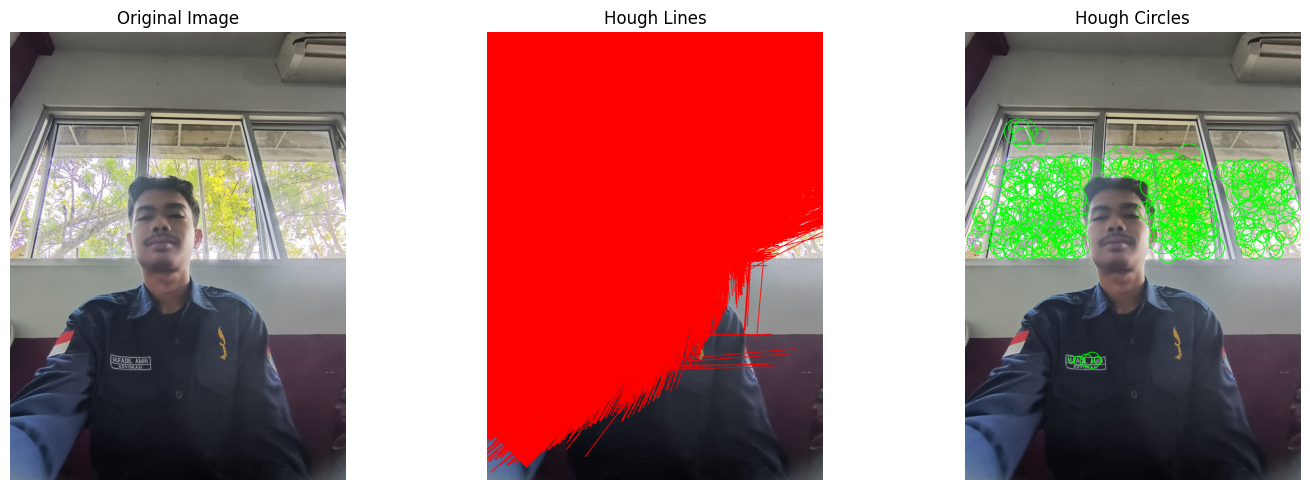

In [ ]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve Hough transform accuracy
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform standard Hough Line Transform
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw detected lines on a copy of the original image
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Perform Hough Circle Transform
circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=10, maxRadius=50)

# Draw detected circles on a copy of the original image
image_with_circles = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(image_with_circles, center, radius, (0, 255, 0), 2)

# Display the original image, lines, and circles using Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))
plt.title('Hough Circles')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving poto2.jpeg to poto2 (2).jpeg


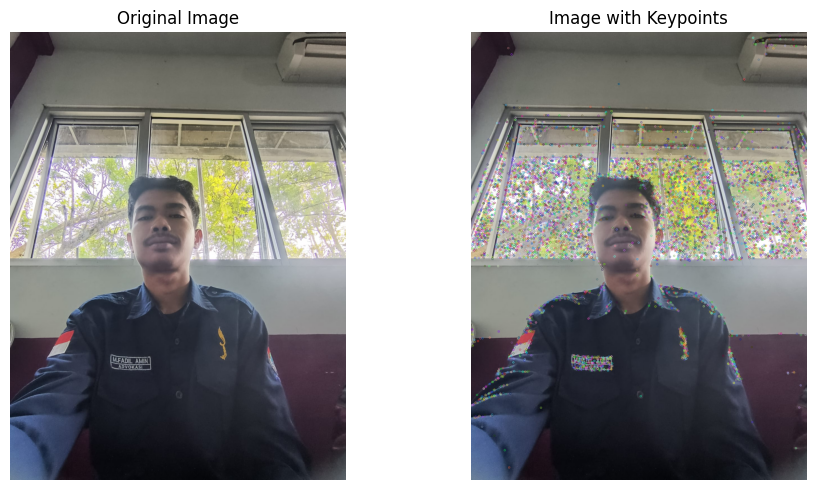

In [9]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the original image and the image with keypoints using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with Keypoints')
plt.axis('off')

plt.tight_layout()
plt.show()

Saving poto2.jpeg to poto2 (3).jpeg


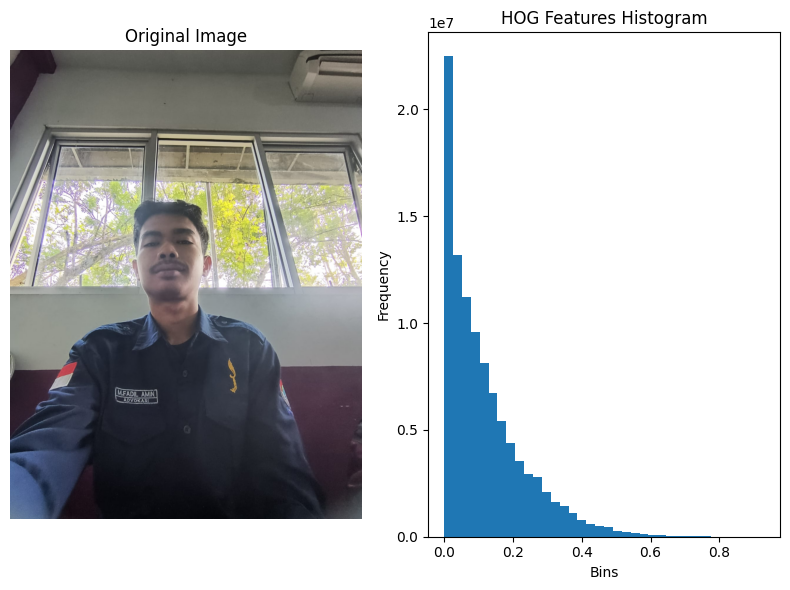

In [10]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a HOG descriptor object
hog = cv2.HOGDescriptor()

# Compute HOG features
hog_features = hog.compute(gray_image)

# Plot the HOG features as a histogram
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(hog_features, bins=36)
plt.title('HOG Features Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Saving poto2.jpeg to poto2 (4).jpeg


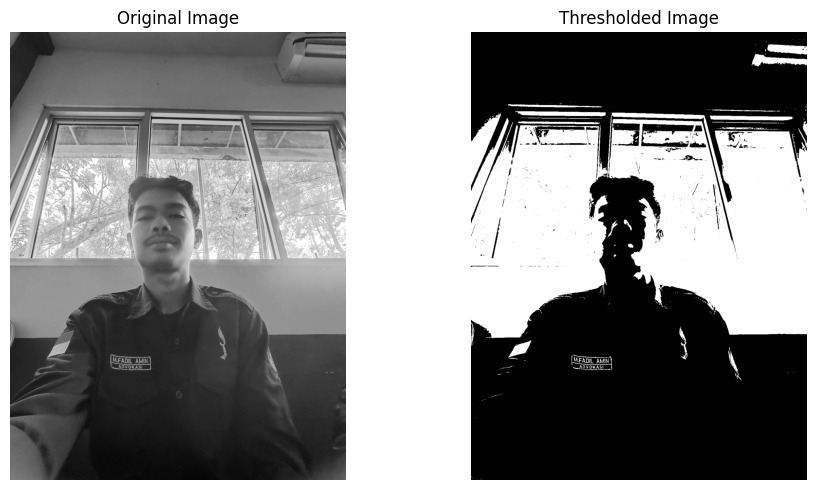

In [11]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image file from your local machine to Colab
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image_path = filename

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding using cv2.threshold()
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()